In [1]:
import os
import sys
import numpy as np
from scipy.interpolate import interp1d

# Чтение Xfoil модуля
PyXfoil_dir = os.path.abspath(os.path.join('../Xfoil/'))
if PyXfoil_dir not in sys.path:
    sys.path.append(PyXfoil_dir)

import py_Xfoil as Xf
import matplotlib.pyplot as plt

In [7]:
def airfoil_geometry(filename):
    '''
    Расчет геометрических параметров профиля по заданным координатам

    Ввод: filename: str - имя файла с координатами профиля или название профия в Xfoil

    Вывод: b: float - хорда профиля, м
           cc: float - относительная толщина профиля крыла в долях хорды
           xx_c: float - относительная координата положения максимальной толщины профиля крыла в долях хорды
           rr_0: float - относительный радиус скругления передней кромки профиля в долях ...(хз) ?
    '''

    # чтение файла с координатами
    res = Xf.read_pack(filename)

    # длина массива координат верхней и нижней части профиля
    ln = round(len(res[:,0])/2-1)

    # массив координат нижней части профиля
    x_dn = Xf.read_pack(filename)[:, 0][ln:]
    y_dn = Xf.read_pack(filename)[:, 1][ln:]

    x0 = x_dn[0]

    # длина хорды профиля
    b = x_dn[-1]

    # массив координат верхней части профиля
    x_up = Xf.read_pack(filename)[:, 0][:ln][::-1]
    y_up = Xf.read_pack(filename)[:, 1][:ln][::-1]

    # интерполяция
    f_dn = interp1d(x_dn, y_dn)
    f_up = interp1d(x_up, y_up)

    # функция для получения интерполированного значения координаты нижней части профиля
    def get_f_dn(x):
        if x>x_dn[-1]:
            x = x_dn[-1]
        if x<x_dn[0]:
            x = x_dn[0]

        return f_dn(x)

    # функция для получения интерполированного значения координаты верхней части профиля
    def get_f_up(x):
        if x>x_up[-1]:
            x = x_up[-1]
        if x<x_up[0]:
            x = x_up[0]

        return f_up(x)

    # массив координат x от носика до конечной точки хорды
    xs = np.linspace(x0, b, 51)

    # начальное значение толщины профиля абсолютной для цикла
    c = 0

    # цикл для поиска наибольшей толщины профиля и относительной координаты расположения наибольшей толщины
    for x in xs:
        if (np.abs(get_f_dn(x)) + np.abs(get_f_up(x))) > c:
            c = (np.abs(get_f_dn(x)) + np.abs(get_f_up(x)))
            xx_c = x / b
            cc = c / b

    # длина хорды профиля
    b = round(b)
    # относительная координата расположения максимальной толщины профиля
    xx_c = round(xx_c, 3)
    # относительная толщина профиля
    cc = round(cc, 3)

    # относительный радиус скругления передней кромки крыла
    rr_0 = 1 # поскольку профиль дозвуковой

    # результат
    return b, cc, xx_c, rr_0

filename = 'NACA0012.dat'
airfoil_geometry(filename)

(1, 0.12, 0.3, 1)

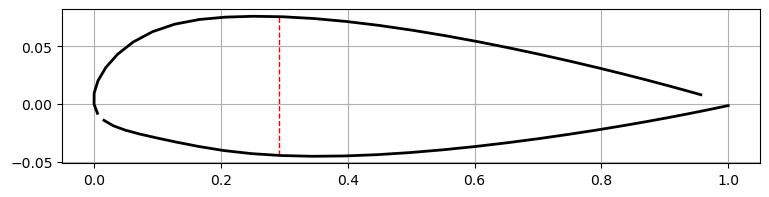

In [3]:
filename = 'NACA23012.dat'

res = Xf.read_pack(filename)

ln = round(len(res[:,0])/2-1)

x_dn = Xf.read_pack(filename)[:, 0][ln:]
y_dn = Xf.read_pack(filename)[:, 1][ln:]

x0 = x_dn[0]
b = x_dn[-1]

f_dn = interp1d(x_dn, y_dn)

x_up = Xf.read_pack(filename)[:, 0][:ln][::-1]
y_up = Xf.read_pack(filename)[:, 1][:ln][::-1]

def get_f_dn(x):
    if x>x_dn[-1]:
        x = x_dn[-1]
    if x<x_dn[0]:
        x = x_dn[0]

    return f_dn(x)

f_up = interp1d(x_up, y_up)

def get_f_up(x):
    if x>x_up[-1]:
        x = x_up[-1]
    if x<x_up[0]:
        x = x_up[0]

    return f_up(x)


xs = np.linspace(x0, b, 51)

cmax = 0
xxc = 0

for i in xs:
    if (np.abs(get_f_dn(i)) + np.abs(get_f_up(i))) > cmax:
        cmax = (np.abs(get_f_dn(i)) + np.abs(get_f_up(i)))
        xxc = i / b
        ind = i

f = plt.figure(figsize=(9, 2))
plt.vlines(xxc, get_f_dn(ind), get_f_up(ind), color = 'red', lw = 1, ls = '--')
plt.plot(x_dn, y_dn, color = 'black', lw = 2)
plt.plot(x_up, y_up, color = 'black', lw = 2)

plt.grid()

In [4]:
import subprocess

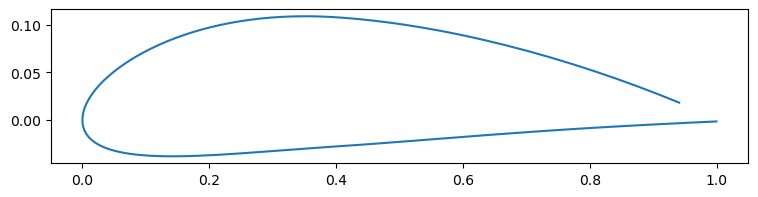

In [5]:
coords = Xf.get_airfoil_coords('naca4414')

f = plt.figure(figsize=(9, 2))
plt.plot(coords[0], coords[1])

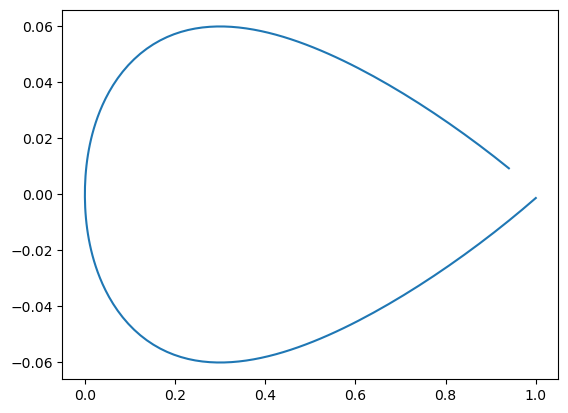

In [6]:
airf = Xf.read_pack('From Xfoil.dat')
plt.plot(airf[:,0], airf[:,1])